# Lab5

In [2]:
# Cho tập dữ liệu winequality 
# 1. Đọc dữ liệu, sau đó hiện thị 5 dòng đầu tiên, thông tin về dữ liệu, thống kê mô tả.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('winequality-red.csv', delimiter=';')
df = pd.DataFrame(data)
print(df.head(5))
print(df.info())
print(df.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [1]:

# Convert columns to numeric
df = df.apply(pd.to_numeric)

# 2. Phân tích khám phá dữ liệu
# 2.1 kiểm tra giá trị thiếu
df.isnull().sum()
# 2.2 Vẽ histogram cho các biến đầu vào và nhận xét
df.hist(bins=10, alpha=0.5, figsize=(15, 20))
plt.tight_layout()

plt.show()

# quanlity có dạng phân phối chuẩn và ancohol có dạng xém phân phối chuẩn


NameError: name 'df' is not defined

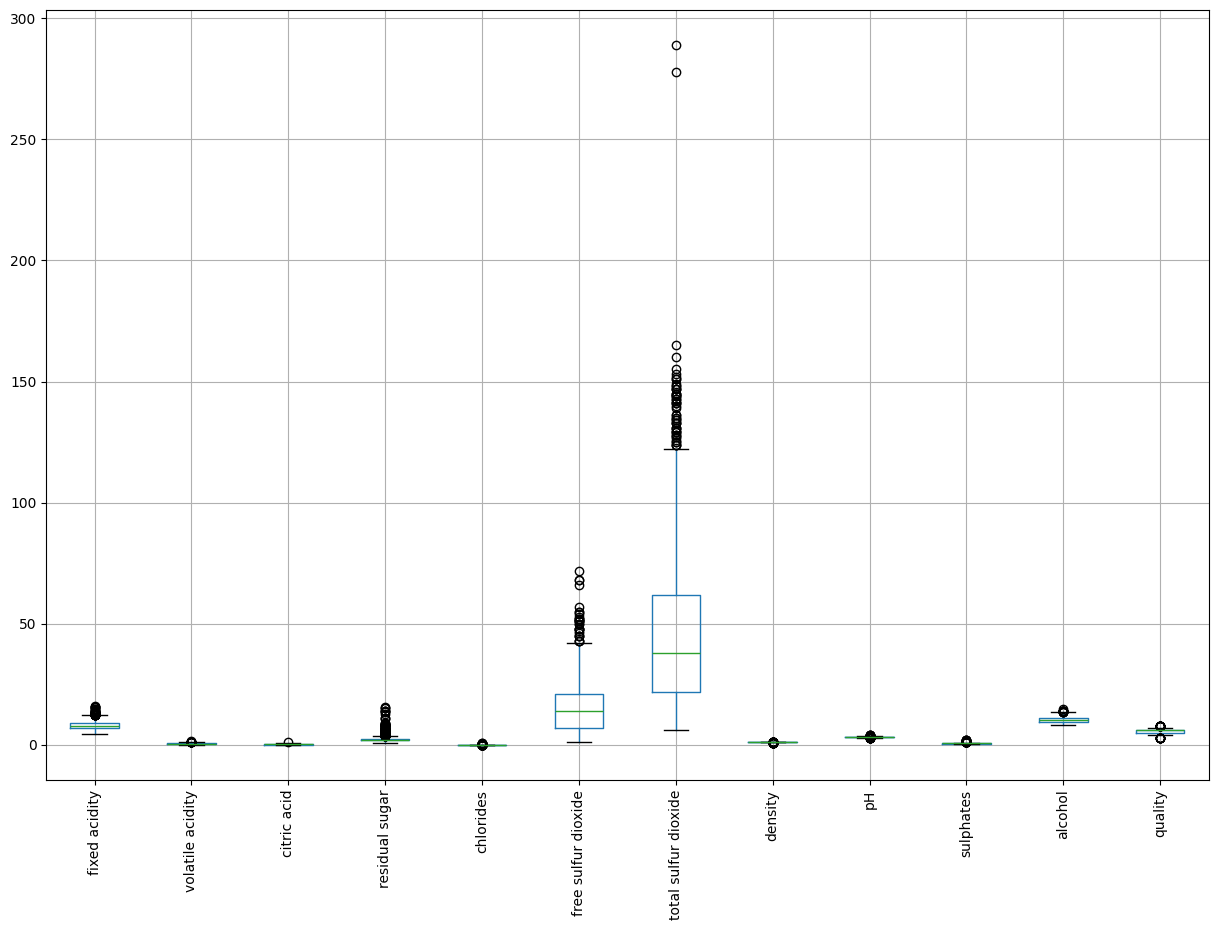

In [ ]:
# 2.3 Vẽ boxplot cho các biến đầu vào và nhận xét
df.boxplot(rot=90, figsize=(15,10))
plt.show()

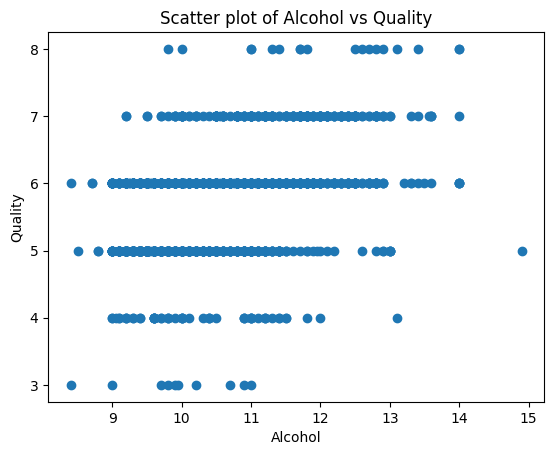

In [ ]:
# 2.4 Vẽ Scatterplot cho "alcohol" và "quality" và nhận xét
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Scatter plot of Alcohol vs Quality')
plt.show()
plt.show()

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

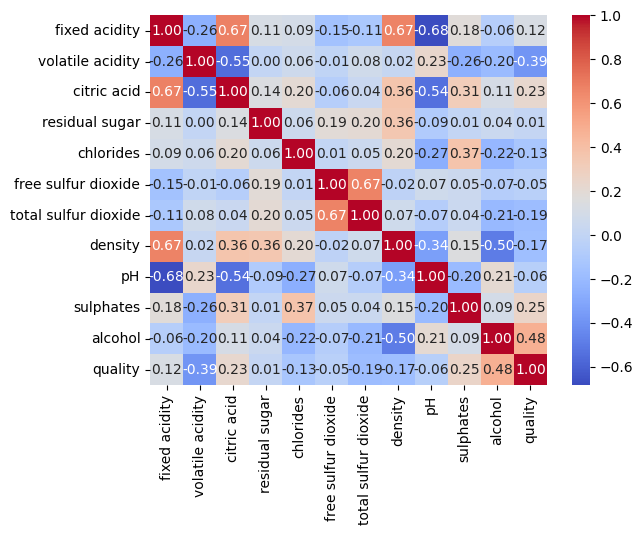

In [ ]:
# 3. Tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan
corr = df.corr()
print(corr)
import seaborn as sns
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
# 4. chia dữ liệu thủ công không dùng thư viện có sẵn
print(df.shape)
# 4.1 Xáo trộn dữ liệu
# Xáo trộn dữ liệu
shuffled_indices = np.random.permutation(df.index)

# 4.2 Chia dữ liệu thành 2 phần train và test theo tỉ lệ 80/20
X_train = df.iloc[:int(df.shape[0]*0.8), :-1]
X_test = df.iloc[int(df.shape[0]*0.8):, :-1]
y_train = df.iloc[:int(df.shape[0]*0.8), -1]
y_test = df.iloc[int(df.shape[0]*0.8):, -1]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

df = df.loc[shuffled_indices].reset_index(drop=True)
print(df)

# 4.3 Tách đặc trưng và nhãn
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


(1599, 12)
(1279, 11)
(320, 11)
(1279,)
(320,)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.4             0.420         0.09             2.3      0.054   
1              10.3             0.410         0.42             2.4      0.213   
2              10.9             0.530         0.49             4.6      0.118   
3               6.7             0.560         0.09             2.9      0.079   
4               7.4             0.580         0.00             2.0      0.064   
...             ...               ...          ...             ...        ...   
1594            6.7             0.750         0.01             2.4      0.078   
1595            6.6             0.695         0.00             2.1      0.075   
1596            9.4             0.395         0.46             4.6      0.094   
1597            7.9             0.660         0.00             1.4      0.096   
1598            6.9             0.685         0.00            

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 5.2 Chuẩn hóa huấn luyện
X_train_scaled = scaler.fit_transform(X_train)

# 5.3 Chuẩn hóa kiểm tra
X_test_scaled = scaler.transform(X_test)


[[ 1.11510144  0.05980721  0.51517771 ... -0.86611902  0.6617185
  -1.33798804]
 [ 1.93034749 -0.29508732  0.66892562 ... -1.58583011 -0.04219442
  -0.36886331]
 [ 0.06692794  0.66039794  1.69391168 ... -0.73526246 -0.80476674
  -1.15041551]
 ...
 [ 1.34802888 -1.19597342  1.13016934 ... -1.12783215 -0.86342615
  -0.58769792]
 [ 1.23156516  0.60579879 -0.15106323 ... -0.47354933  0.0751244
  -0.49391166]
 [ 1.69742005  0.76959626  1.43766516 ... -0.9315473   0.30976204
  -0.86905672]]


In [ ]:
# 6. Ứng dụng mô hình hồi quy tuyến tính
# 6.1 Khởi tạo mô hình
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 6.2 Huấn luyện mô hình
model.fit(X_train_scaled, y_train)

# 6.3 Đánh giá mô hình
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# 6.4 Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)
print("Predictions:", y_pred)




Coefficients: [ 0.04034147 -0.18709806 -0.03538104  0.0138918  -0.08421405  0.03424482
 -0.12378345 -0.0367504  -0.05296048  0.14046564  0.31046425]
Intercept: 5.6637998436278325
Predictions: [6.37313356 5.7210279  5.7210279  5.67433952 5.38657614 5.89716748
 5.84594371 6.601727   6.37384    5.69014752 5.69014752 5.655979
 5.79980458 6.41030444 5.19443202 5.79980458 5.20387822 5.20387822
 6.24488138 6.16334217 4.49650417 6.02262114 5.60081203 6.30543413
 6.08566694 4.88114893 5.1849622  5.22898434 5.68346587 5.22898434
 5.19591267 5.1849622  6.45056335 4.88016857 5.56782402 5.55973284
 5.16454433 5.8641758  6.24100303 5.16454433 5.03107776 5.26667195
 5.8550522  6.26347279 6.23234942 5.77620952 5.77620952 5.77620952
 5.77620952 5.27919994 5.17028767 5.17028767 4.75558761 5.60123832
 5.09478756 5.06194691 6.32671701 5.39657501 5.39657501 5.39657501
 5.68585533 5.68585533 5.68585533 5.60222925 5.68585533 5.99953305
 5.71011079 5.89423039 5.17928122 5.17928122 5.67496905 5.38139333
 5.930

In [ ]:
from sklearn.metrics import mean_squared_error

# 7 Đánh giá mô hình
# Tính MSE avf R**2
# Tính MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Tính R^2 score
r2_score = model.score(X_test_scaled, y_test)
print("R^2 score:", r2_score)

Mean Squared Error: 0.8582655495445455
R^2 score: 0.3495183775184316


## BTVN

In [ ]:
# 1. hoàn thành bt ở trên sao cho đoạn code có thể chạy mượt mà và chính xác

# 2. Cho bộ dữ liệu sau: howlongwelive
howlongwelive = pd.read_csv('howlongwelive.csv')

# 2.1 cho biết có bn cột và bn hàng
rows, columns = howlongwelive.shape
print(f"Số hàng: {rows}, Số cột: {columns}")

# 2.2 cho biết danh sách tên của các cột
print("Danh sách tên các cột:", howlongwelive.columns.tolist())

# 2.3 thử dùng df["status"]
print(howlongwelive["Status"].head())

# 2.4 tính số lượng các nước đang phát triển và các nước phát triển
developing_countries = howlongwelive[howlongwelive["Status"] == "Developing"].shape[0]
developed_countries = howlongwelive[howlongwelive["Status"] == "Developed"].shape[0]
print(f"Số lượng các nước đang phát triển: {developing_countries}")
print(f"Số lượng các nước phát triển: {developed_countries}")

# 2.5 tính min, max, mean, median của Alcohol
min_alcohol = howlongwelive["Alcohol"].min()
max_alcohol = howlongwelive["Alcohol"].max()
mean_alcohol = howlongwelive["Alcohol"].mean()
median_alcohol = howlongwelive["Alcohol"].median()
print(f"Min Alcohol: {min_alcohol}, Max Alcohol: {max_alcohol}, Mean Alcohol: {mean_alcohol}, Median Alcohol: {median_alcohol}")

# 2.6
# 2.6.1 đếm những hàng có alcohol nhiều hơn mức trung bình và liệt kê những quốc gia đó
above_mean_alcohol = howlongwelive[howlongwelive["Alcohol"] > mean_alcohol]
print(f"Số lượng quốc gia có alcohol nhiều hơn mức trung bình: {above_mean_alcohol.shape[0]}")
print("Danh sách các quốc gia đó:", above_mean_alcohol["Country"].tolist())

# 2.6.2 lấy những quốc gia có trình độ học vấn và gdp cao hơn mức trung bình
mean_education = howlongwelive["Schooling"].mean()
mean_gdp = howlongwelive["GDP"].mean()
high_edu_gdp_countries = howlongwelive[(howlongwelive["Schooling"] > mean_education) & (howlongwelive["GDP"] > mean_gdp)]
print("Danh sách các quốc gia có trình độ học vấn và gdp cao hơn mức trung bình:", high_edu_gdp_countries["Country"].tolist())


Số hàng: 2938, Số cột: 22
Danh sách tên các cột: ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object
Số lượng các nước đang phát triển: 2426
Số lượng các nước phát triển: 512
Min Alcohol: 0.01, Max Alcohol: 17.87, Mean Alcohol: 4.602860787172012, Median Alcohol: 3.755
Số lượng quốc gia có alcohol nhiều hơn mức trung bình: 1171
Danh sách các quốc gia đó: ['Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Antigua and Barbuda', 'Antigua 